In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [3]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

<b> So we have 5572 rows and 5 columns in our dataset

<b> Now, lets start with data cleaning phase to clean our data from missing values, outliers, etc.

## <b>1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


<B> we can drop last 3 columns as we will not consider them in our classification task

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
df.shape

(5572, 2)

<b>Let's rename the columns to some meaningful names

In [9]:
df.rename(columns={'v1':'target','v2':'text_data'},inplace=True)

In [10]:
df.head()

,target,text_data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<b>Now, we can do 1 thing, we can change ham to 0 and spam to 1, so that we will get numerical target

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text_data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<B> So here, ham is mapped to 0 and spam to 1 using label encoder

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   target     5572 non-null   int32 
 1   text_data  5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


<b>Let's check for missing values and duplicate values and if any missing value we will handle it and if any duplicate values, we will drop them

In [14]:
df.isnull().sum()

target       0
text_data    0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## <b>2. EDA

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

<b>We can clearly see that the dataset is imbalanced

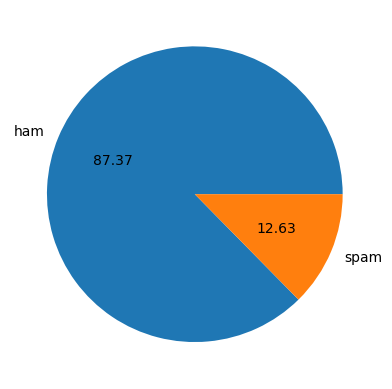

In [19]:
plt.pie(df['target'].value_counts(),labels = ['ham','spam'], autopct='%0.2f')
plt.show()

<b> Let's create 3 more columns which will display the frequency of words, sentence and letters in text column

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ketan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters'] = df['text_data'].apply(len)

In [23]:
df['num_words'] = df['text_data'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sent'] = df['text_data'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,text_data,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
df[df['target']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
df[df['target']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

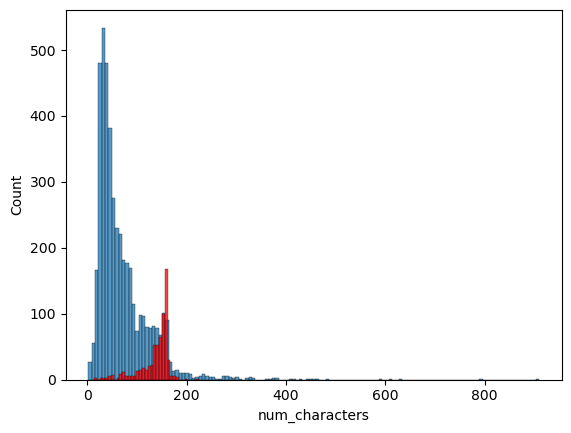

In [28]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

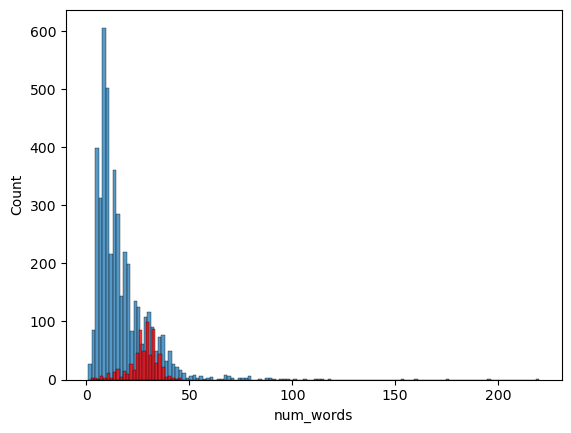

In [29]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sent', ylabel='Count'>

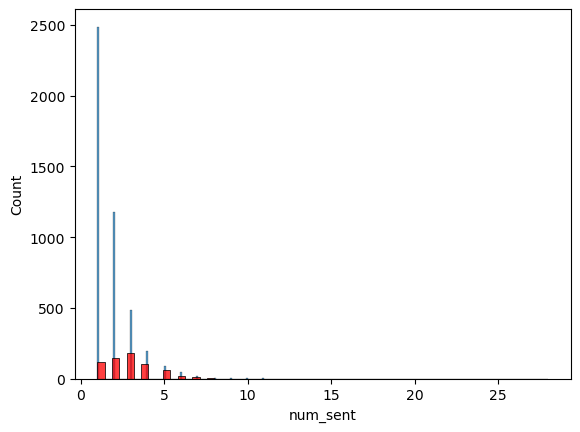

In [30]:
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='red')

<b>So we can say that by looking at the graphs that for spam emails no of sentences, words and letters are more as compared to ham and that is correct in real sense as well

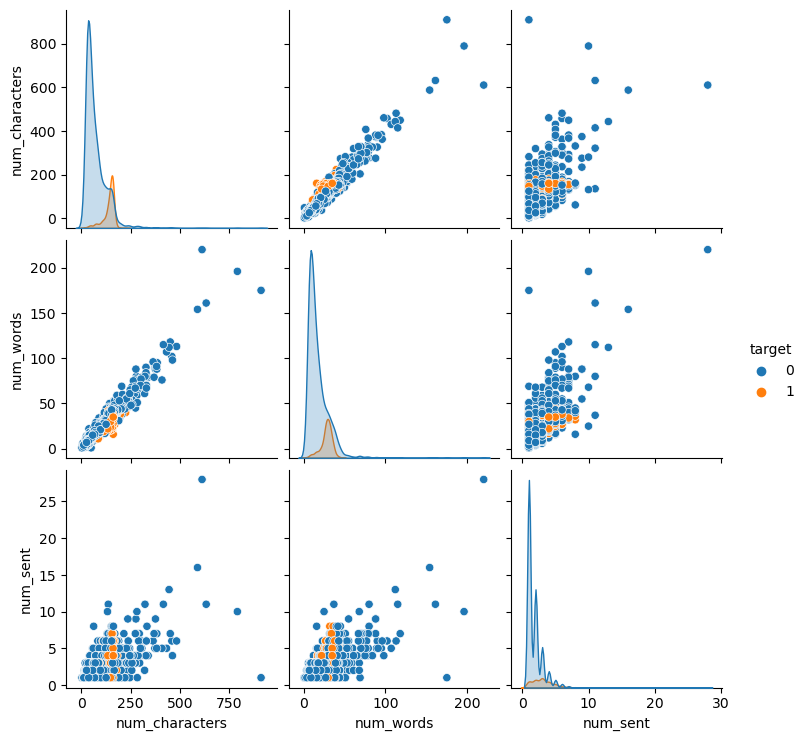

In [31]:
sns.pairplot(df,hue='target')

<b>Let's find out correlation between the variables

<AxesSubplot:>

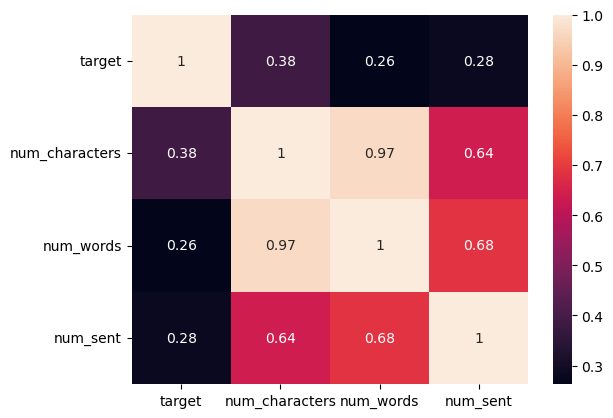

In [32]:
sns.heatmap(df.corr(),annot=True)

<b>So we can say that for num characters, num words, num sent all are correlated to each other, so going ahead we can use any one for our model building

## 3. Data Preprocessing

<b>i.Lower case

<b>ii.Tokenization

<b>iii.Removing special characters

<b>iv.Removing stop words and punctuation

<b>v.Stemming

In [33]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [34]:
ps = PorterStemmer()

In [35]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [36]:
transform_text("I'm gonna be home soon and i don't want to talk")

'gon na home soon want talk'

In [37]:
df['transformed_text'] = df['text_data'].apply(transform_text)

In [38]:
df.head()

,target,text_data,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud

In [40]:
wc = WordCloud(width = 500,height=500,min_font_size=10,background_color='white')

In [41]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

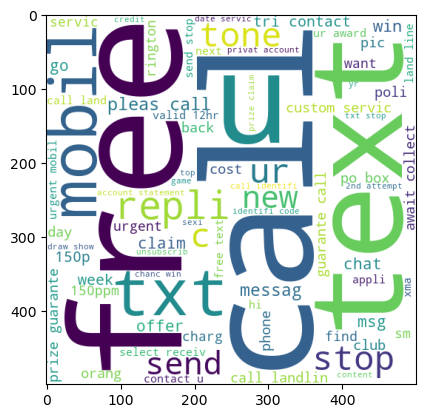

In [42]:
plt.imshow(spam_wc)

In [43]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

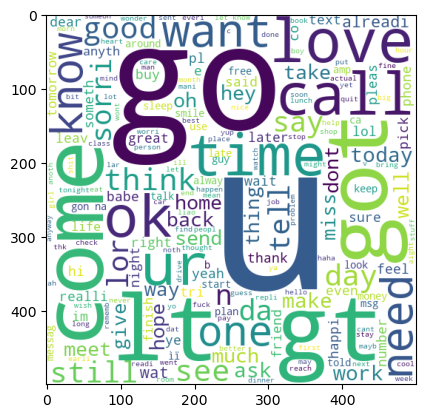

In [44]:
plt.imshow(ham_wc)

In [45]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

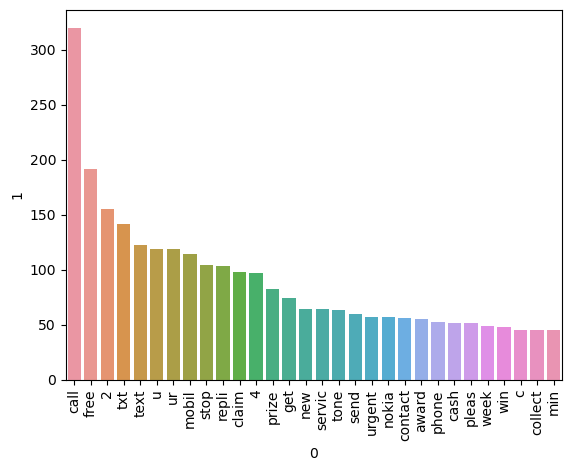

In [47]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

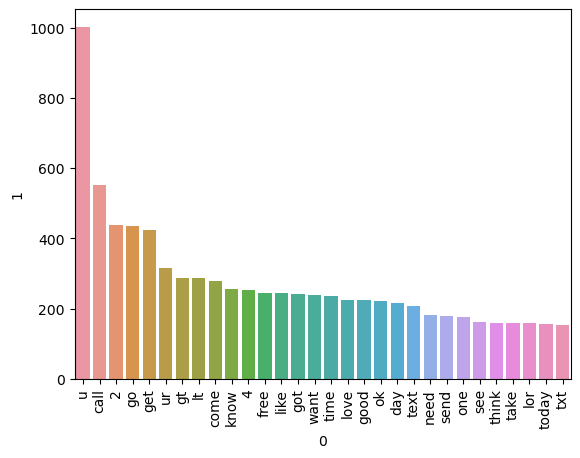

In [49]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## <b>4. Model Building

<b>We have the transformed text column which is textual, we need to convert that in numerical, for it we will use tfidf Vectorizer

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [52]:
y = df['target']
y.shape

(5169,)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb,
    'GNB': gnb,
    'BNB': bnb, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [58]:
def model_build_evaluate(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [59]:
model_build_evaluate(xgb,X_train,X_test,y_train,y_test)

(0.971953578336557, 0.943089430894309)

In [60]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = model_build_evaluate(clf,X_train,X_test,y_train,y_test)
    
    print('For :',name)
    print('Accuracy - ',current_accuracy)
    print('Precision - ',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For : SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For : KN
Accuracy -  0.9052224371373307
Precision -  1.0
For : MNB
Accuracy -  0.9709864603481625
Precision -  1.0
For : GNB
Accuracy -  0.8694390715667312
Precision -  0.5068493150684932
For : BNB
Accuracy -  0.9835589941972921
Precision -  0.991869918699187
For : LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For : RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For : AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For : GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For : xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [61]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [62]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,MNB,0.970986,1.000000
4,BNB,0.983559,0.991870
6,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
5,LR,0.958414,0.970297
9,xgb,0.971954,0.943089
7,AdaBoost,0.960348,0.929204
8,GBDT,0.947776,0.920000
3,GNB,0.869439,0.506849


<b>Here we can go with Multinomial Naive Bayes model, as it's Precision value is good and Accuracy also good, we can chose KNN, but it's accuracy is low, so better to chose MNB 

In [63]:
import pickle
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

# <b>Thank You !!!